In [163]:
from scipy import signal
import pandas as pd
import numpy as np
from pandas_datareader import data
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import normalize, scale

In [175]:
def download_financial_data(name, source,
                            startdate = '2010-01-01',
                            enddate = '2012-01-01'
#                             startdate = '2018-01-01', 
#                             enddate = dt.date.today()
                           ):
    df = data.DataReader(name, source,startdate, enddate)
    return df

def download_adj_close(name, source, 
                       startdate = '2000-01-01', 
                       enddate = dt.date.today()):
    return download_financial_data(name, source, startdate, enddate)['Adj Close']

def get_logreturns(df):
    delt = ((df.index.shift(1,'B')-df.index).to_series().dt.days).values
    return np.log(df/df.shift(1))/np.sqrt(delt)

In [177]:
SPY = download_adj_close('SPY', 'yahoo')
rSPY = get_logreturns(SPY)


rSPY = rSPY.dropna()

Text(0, 0.5, 'period')

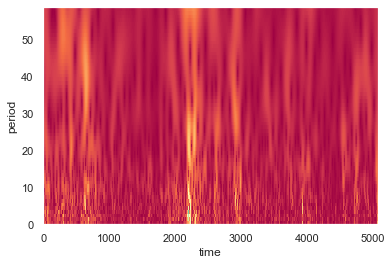

In [189]:
widths = np.arange(1,60)
# f = 1/dt
# freq = np.linspace(0, f/2, 5071)
cwtm = signal.cwt(rSPY, signal.morlet2, widths, dtype = 'complex128')

acwtm = np.abs(cwtm)
plt.pcolormesh(acwtm,  cmap = 'Spectral') #extent = [-10,10,0,10],
plt.xlabel('time')
plt.ylabel('period')

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: All-NaN slice encountered
  import sys


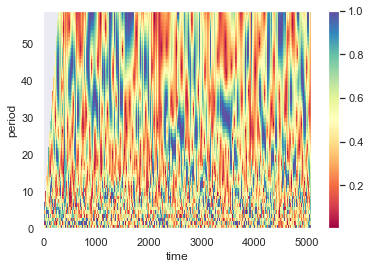

In [324]:
XOM = download_adj_close('XOM', 'yahoo')
rXOM = get_logreturns(XOM)
XOM = XOM.dropna()

cwtm = signal.cwt(rXOM, signal.morlet2, widths, dtype = 'complex128')
acwtm = np.abs(cwtm)
plt.pcolormesh(acwtm/np.nanmax(acwtm,0),  cmap = 'Spectral') #extent = [-10,10,0,10],
plt.xlabel('time')
plt.ylabel('period')
plt.colorbar()

In [318]:
np.nanmax(acwtm)

0.1878987718540826

C:\Users\steve\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: All-NaN slice encountered
  import sys


(59, 2437)

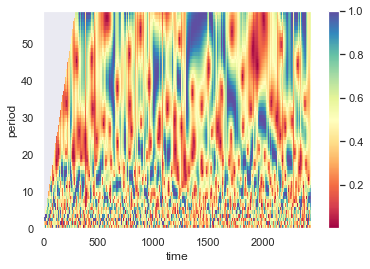

In [442]:
TSLA = download_adj_close('TSLA', 'yahoo')
rTSLA = get_logreturns(TSLA)
TSLA = TSLA.dropna()

cwtm = signal.cwt(rTSLA, signal.morlet2, widths, dtype = 'complex128')
acwtm = np.abs(cwtm)
plt.pcolormesh(acwtm/np.nanmax(acwtm,0),  cmap = 'Spectral') #extent = [-10,10,0,10],
plt.xlabel('time')
plt.ylabel('period')
plt.colorbar()
cwtm.shape

In [445]:
def showchart(ticker, period = 60, back = 1000):
    raw = download_adj_close(ticker, 'yahoo')
    ret = get_logreturns(raw).dropna()
    widths = np.arange(1,period)
    cwtm = signal.cwt(ret, signal.morlet2, widths, dtype = 'complex128')
    acwtm = np.abs(cwtm)
    fig, (a, b) = plt.subplots(figsize = (10,4),ncols = 2)
#     fig.figsize(8,8)
    sc = b.pcolormesh((acwtm/np.nanmax(acwtm,0))[:,-back:],  cmap = 'Spectral') #extent = [-10,10,0,10],
    
    usc = a.pcolormesh((acwtm)[:,-back:],  cmap = 'Spectral') #extent = [-10,10,0,10],
    plt.xlabel('time')
    plt.ylabel('period')
    fig.colorbar(usc, ax = a)
    fig.colorbar(sc, ax=b)
    plt.show(fig)
    plt.close(fig)

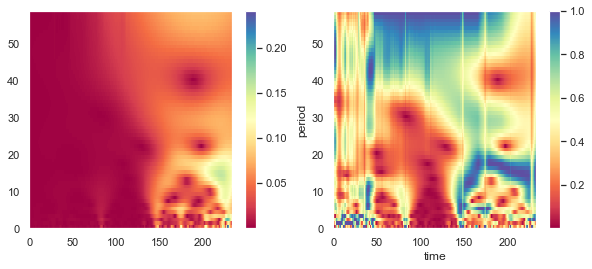

In [446]:
showchart('SPCE')

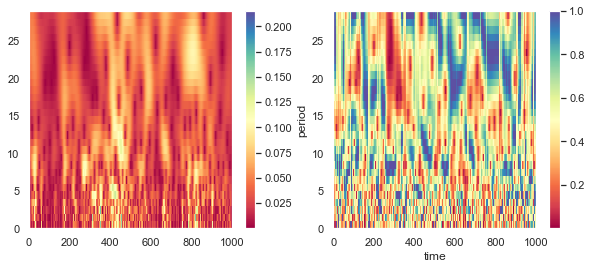

In [423]:
showchart('BTCUSD=X',30)

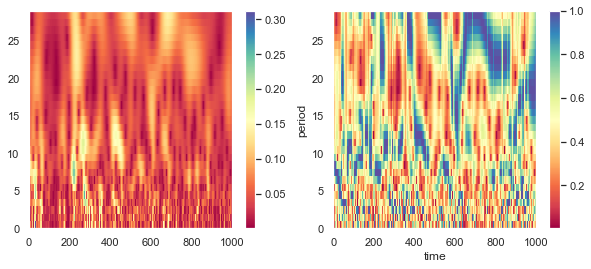

In [424]:
showchart('ETHUSD=X',30)

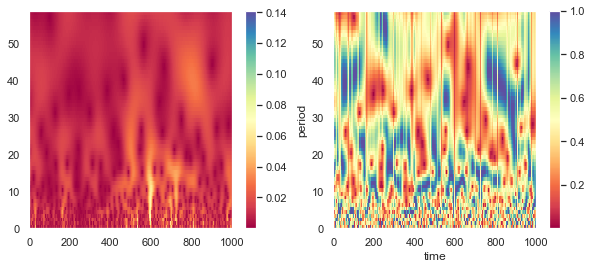

In [380]:
showchart('FB')

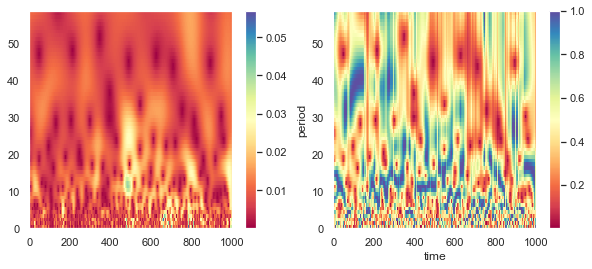

In [381]:
showchart('GOOG')

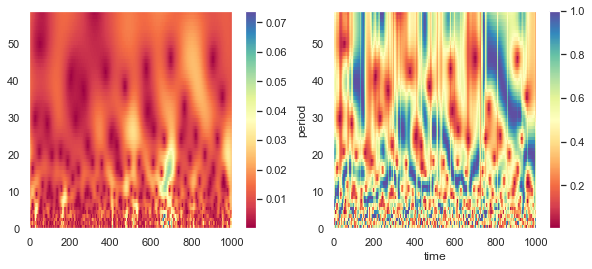

In [382]:
showchart('AMZN')

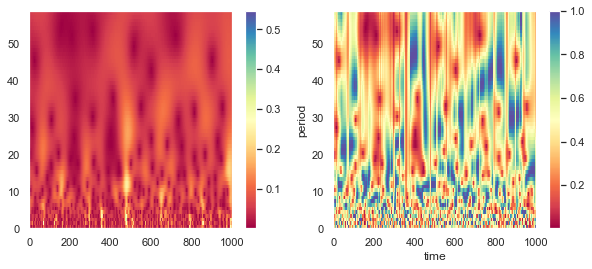

In [383]:
showchart('^VIX')

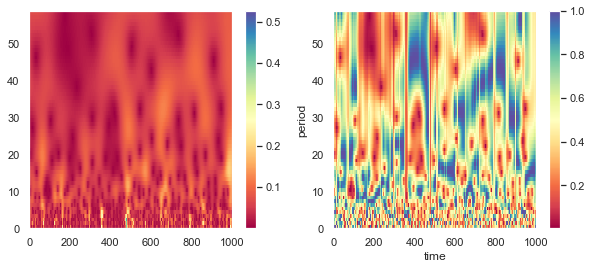

In [384]:
showchart('TVIX')

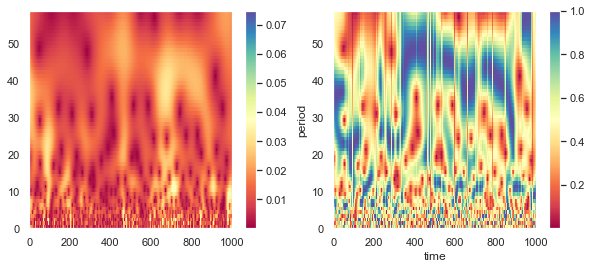

In [385]:
showchart('F')

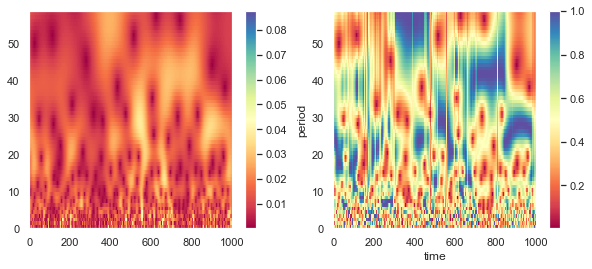

In [425]:
showchart('GM')

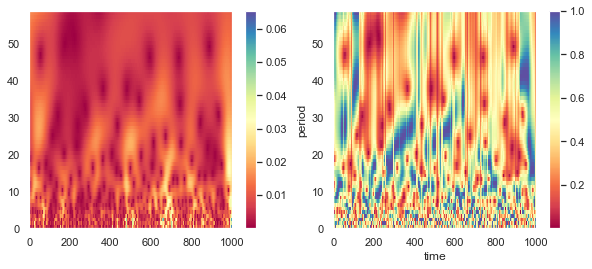

In [386]:
showchart('MSFT')

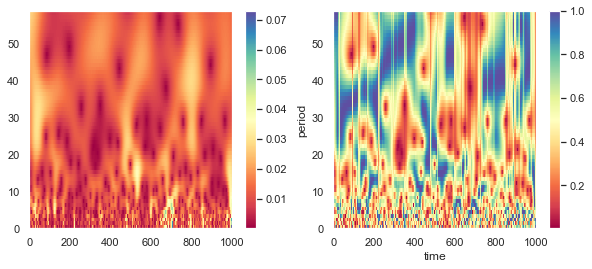

In [387]:
showchart('AAPL')

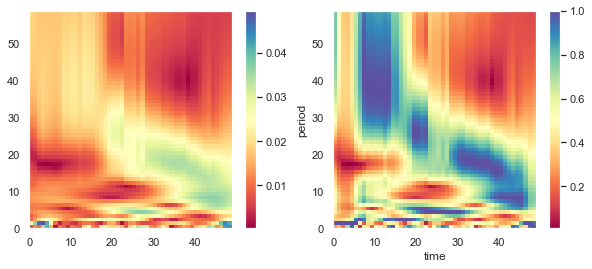

In [388]:
showchart('HO=F')

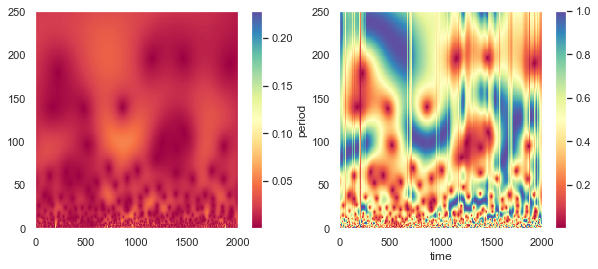

In [426]:
showchart('CRUD.L',252, 2000)

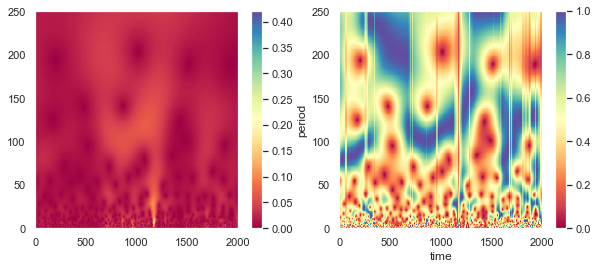

In [427]:
showchart('OIL', 252,2000)

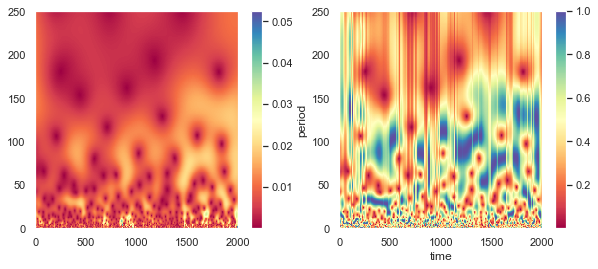

In [428]:
showchart('XOM', 252,2000)

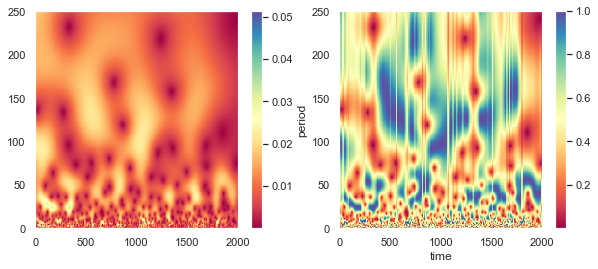

In [390]:
showchart('SOYB.L',252, 2000)

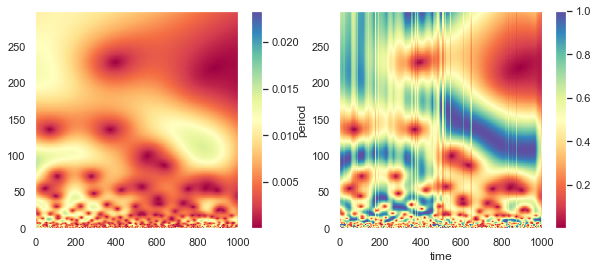

In [391]:
showchart('GLD', 300)

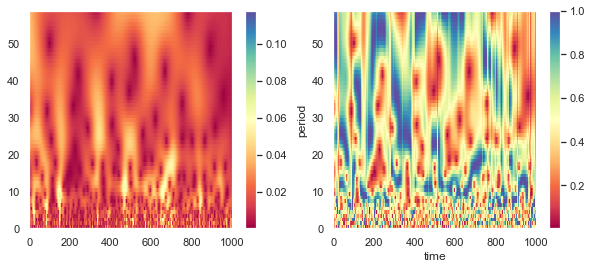

In [392]:
showchart('NFLX')

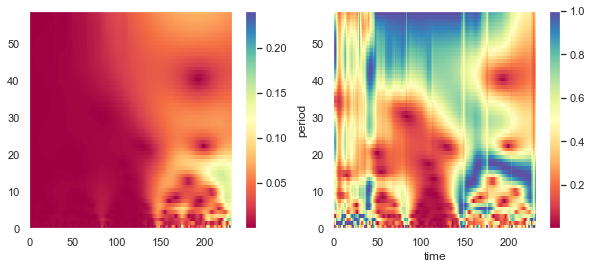

In [395]:
showchart('SPCE')

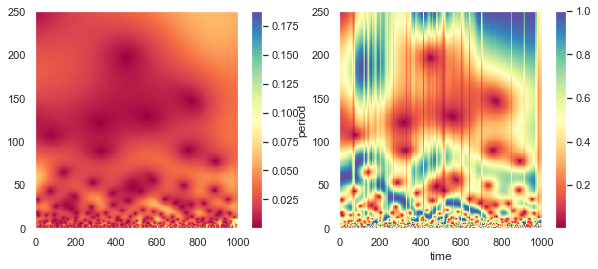

In [396]:
showchart('TSLA', 252)

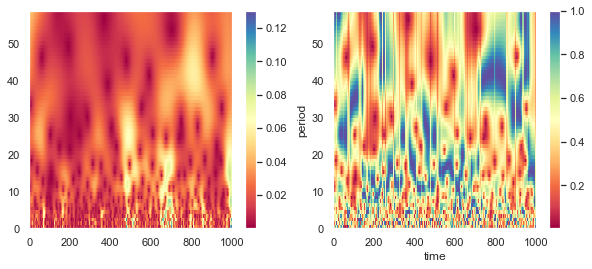

In [397]:
showchart('TQQQ')

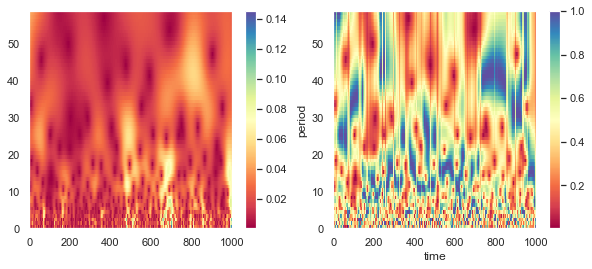

In [398]:
showchart('SQQQ')

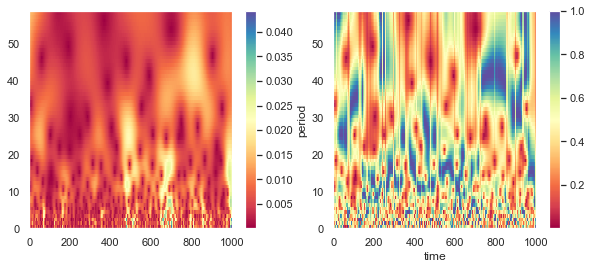

In [399]:
showchart('QQQ')

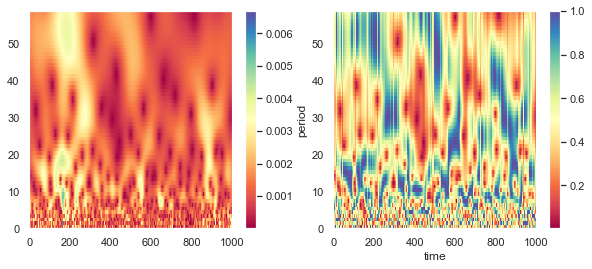

In [400]:
showchart('BOND')

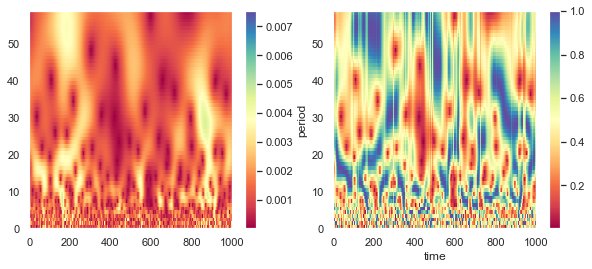

In [414]:
showchart('BND')

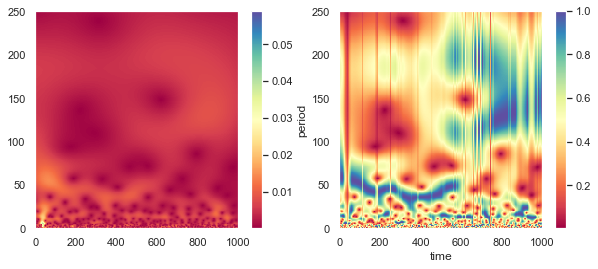

In [435]:
showchart('GBPUSD=X',252)

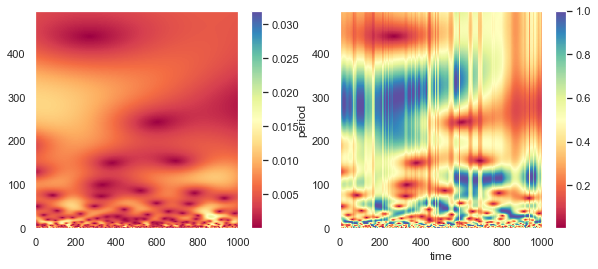

In [434]:
showchart('TLT',500,1000)

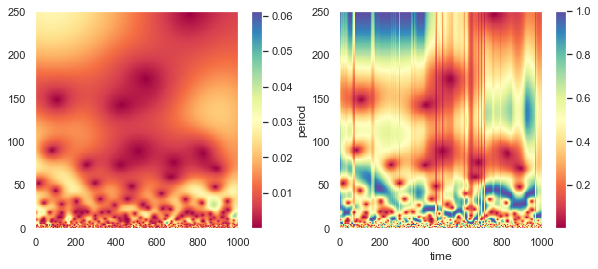

In [433]:
showchart('MS',252)

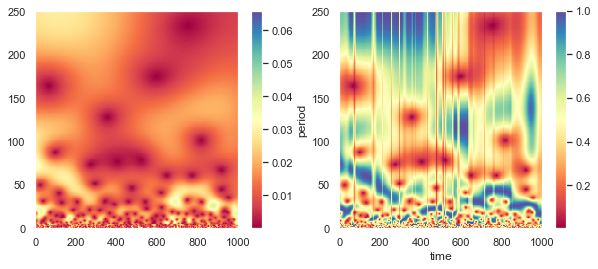

In [405]:
showchart('BAC',252)

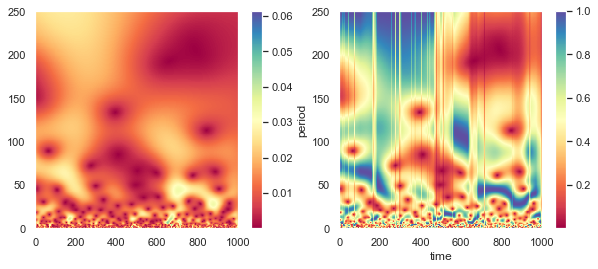

In [406]:
showchart('GS', 252)

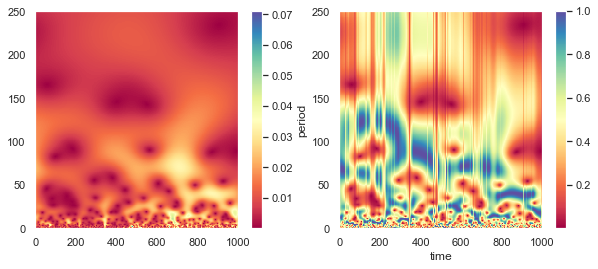

In [407]:
showchart('BA',252)

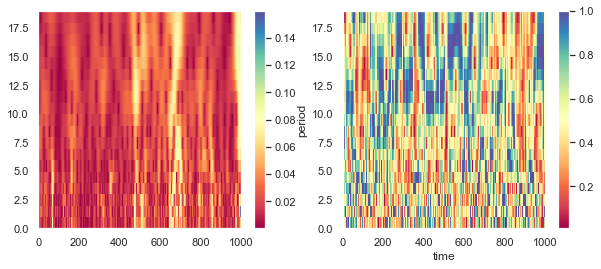

In [436]:
showchart('TQQQ', 20)

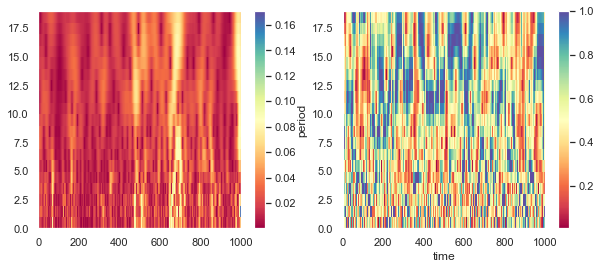

In [438]:
showchart('SQQQ',20)